# Лабораторна робота №1. 
## Лінійна фільтрація зображень. Виділення границь об'єктів.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### 1. Виконати інвертування кольорової інтенсивності пікселів завантаженого користувачем зображення. Вивести вхідне та отримане зображення;

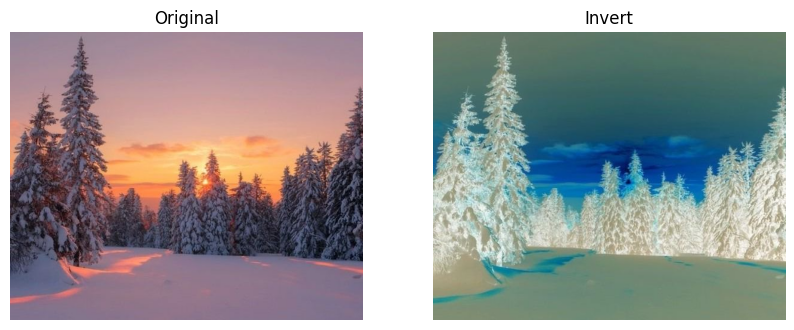

In [2]:
img_1 = cv2.imread('winter.jpg')
img_1 = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

invert_img = 255 - img_1

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_1)
plt.title("Original")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(invert_img)
plt.title("Invert")
plt.axis("off")

plt.show()

### 2. Для деякої (однієї з трьох) компонент виконати зміну, наприклад, до кожного пікселя додати якесь постійне значення. Вивести усі зображення в об’єкти типу ImageView.

(np.float64(-0.5), np.float64(590.5), np.float64(483.5), np.float64(-0.5))

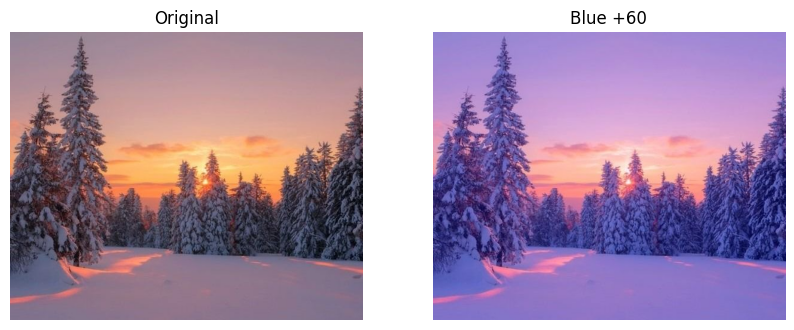

In [3]:
img_new = img_1.copy()
# print(np.max(img_new[:, :, 2] + 250))
img_new[:, :, 2] = np.clip(img_new[:, :, 2] + 60, 0, 255)  

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_1)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_new)
axes[1].set_title("Blue +60")
axes[1].axis("off")


### 3. Виконати розбивку зображення на компоненти Red, Green та Blue.

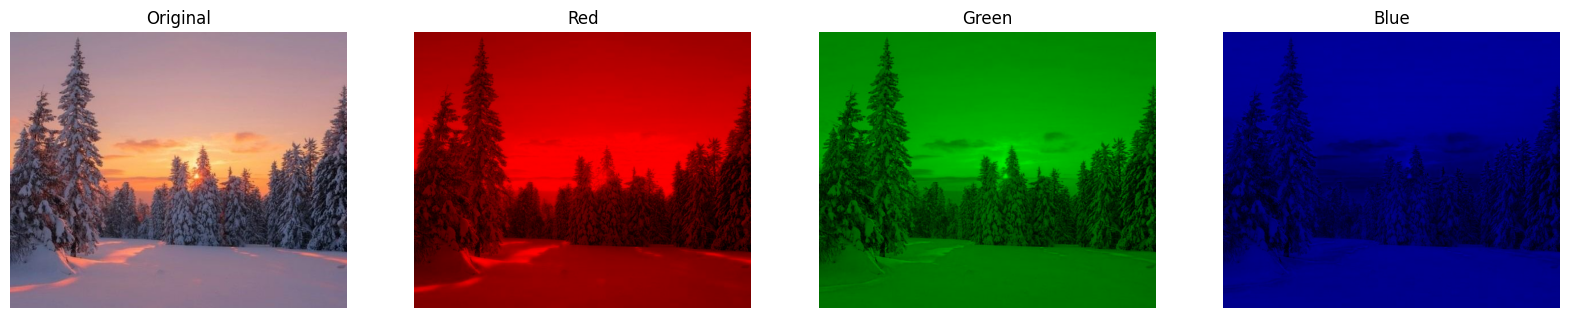

In [4]:
red = img_1.copy()
green = img_1.copy()
blue = img_1.copy()

red[:, :, [1,2]] = 0  
green[:, :, [0, 2]] = 0  
blue[:, :, [0,1]] = 0  

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

axes[0].imshow(img_1)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(red)
axes[1].set_title("Red")
axes[1].axis("off")

axes[2].imshow(green)
axes[2].set_title("Green")
axes[2].axis("off")

axes[3].imshow(blue)
axes[3].set_title("Blue")
axes[3].axis("off")

plt.show()

### 4.1 Bиконати «злиття» двох зображень у певних пропорціях (долях від одиниці, яка береться за 100%) 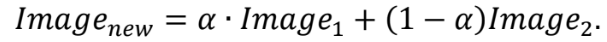

In [5]:
img_2 = cv2.imread('sunset.jpg')
img_2 = cv2.cvtColor(img_2, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

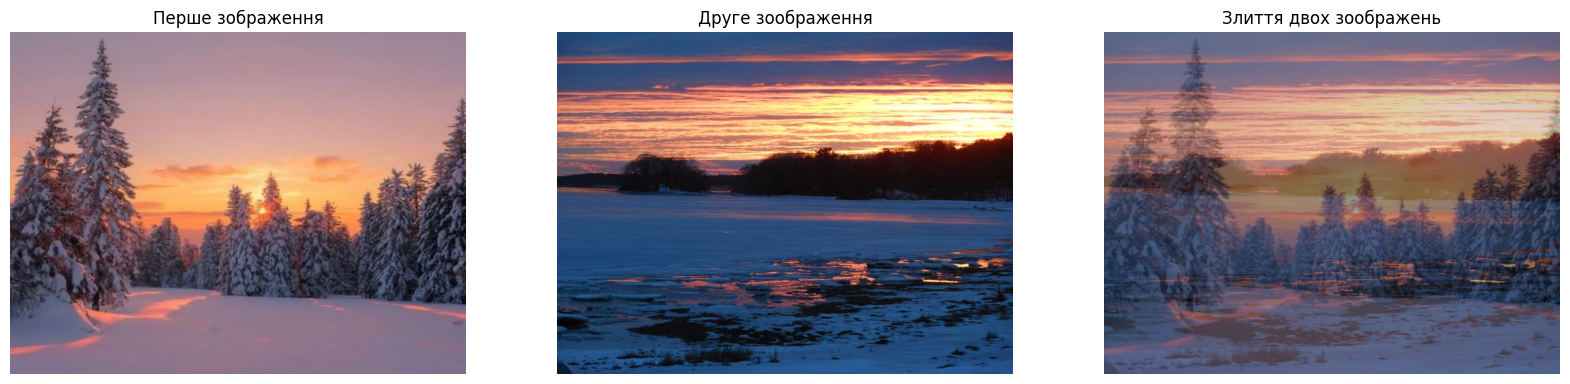

In [6]:
img_1 = cv2.resize(img_1, (img_2.shape[1], img_2.shape[0]))

alpha = 0.5
img_new = np.zeros(img_2.shape, dtype=np.uint8)

for i in range(img_new.shape[0]):
    for j in range(img_new.shape[1]):
        
        img_new[i,j] = alpha*img_1[i,j] + (1-alpha)*img_2[i,j]
        
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

axes[0].imshow(img_1)
axes[0].set_title("Перше зображення")
axes[0].axis("off")

axes[1].imshow(img_2)
axes[1].set_title("Друге зоображення")
axes[1].axis("off")

axes[2].imshow(img_new)
axes[2].set_title("Злиття двох зоображень")
axes[2].axis("off")

### 4.2 Вивести анімацію зображень.

In [7]:
img_h, img_w, img_c = img_1.shape
step = 0.02
frames = int(1 / step)  
alpha_values = np.linspace(0, 1, frames)  
animation = np.zeros((img_h, img_w, img_c, frames), dtype=np.uint8)

for k in range(frames):
    alpha = alpha_values[k] 
    animation[:, :, :, k] = (alpha * img_2 + (1 - alpha) * img_1).astype(np.uint8)  
 
for k in range(frames):
    frame = animation[:, :, :, k]
    cv2.imshow("Animation", frame)
    if cv2.waitKey(50) & 0xFF == ord('q'): 
        break

cv2.destroyAllWindows()

### 5.1 Фільтр розмиття

In [8]:
filter_blur = np.array([0.028087, 0.23431, 0.475207, 0.23431, 0.028087])

size = len(filter_blur)
img_h, img_w, img_c = img_1.shape
pad = size // 2

blur_h = np.zeros_like(img_1, dtype=np.float32)
blur_v = np.zeros_like(img_1, dtype=np.float32)

for c in range(img_c):
    pad_image = np.pad(img_1[:, :, c], ((0, 0), (pad, pad)), mode='reflect')
    for i in range(img_h):
        for j in range(img_w):
            blur_h[i, j, c] = np.sum(pad_image[i, j:j+size ] * filter_blur)

for c in range(img_c):
    pad_image = np.pad(blur_h[:, :, c], ((pad, pad), (0, 0)), mode='reflect')
    for i in range(img_h):
        for j in range(img_w):
            blur_v[i, j, c] = np.sum(pad_image[i:i+size, j] * filter_blur)      

blur_v = np.clip(blur_v, 0, 255).astype(np.uint8)

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

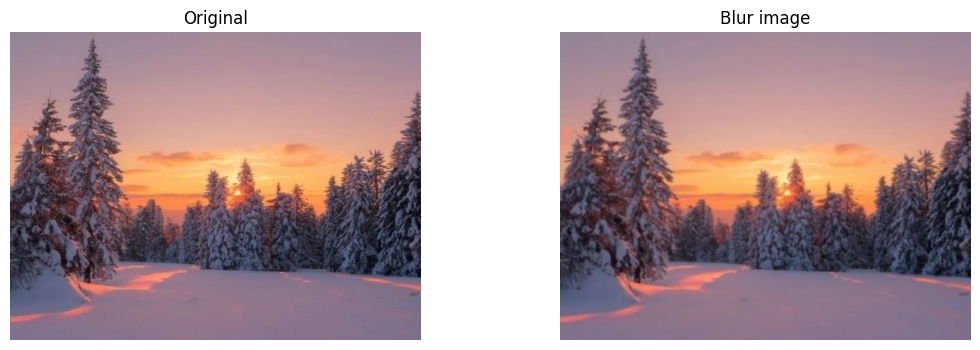

In [21]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(img_1)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(blur_v)
axes[1].set_title("Blur image")
axes[1].axis("off")                   

### 5.2 Фільтр поліпшення чіткості

In [10]:
filter = np.array([[-1, -1, -1],
                     [-1, 9, -1], 
                     [-1, -1, -1]])

img_h, img_w, img_c = img_1.shape
filter_h, filter_w = filter.shape

pad = filter_h // 2 

padded_img = np.pad(img_1, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
result = np.zeros_like(img_1, dtype=np.float32)

for c in range(img_c):  
    for i in range(img_h):
         for j in range(img_w):
             
            region = padded_img[i:i + filter_h, j:j + filter_w, c]  
            result[i, j, c] = np.sum(region * filter)
                 
result = np.clip(result, 0, 255).astype(np.uint8)

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

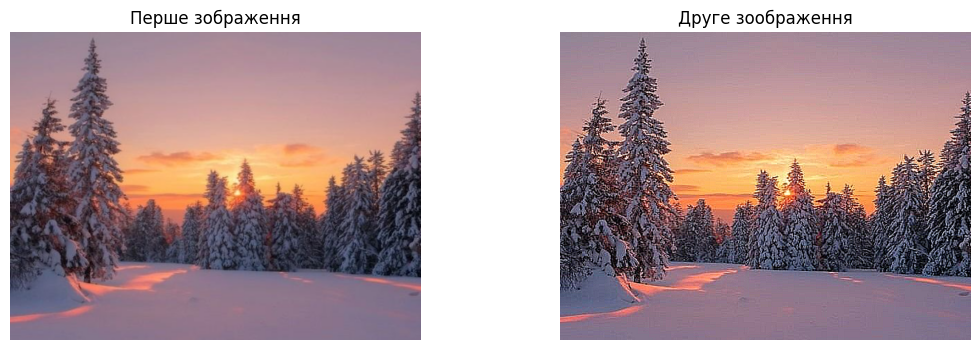

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(img_1)
axes[0].set_title("Перше зображення")
axes[0].axis("off")

axes[1].imshow(result)
axes[1].set_title("Друге зоображення")
axes[1].axis("off")

### 5.3 Mедіанний фільтр

In [12]:
size_filter = 7

img_h, img_w, img_c = img_1.shape
pad = size_filter // 2 

padded_img = np.pad(img_1, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
result_2 = np.zeros_like(img_1) 

for c in range(img_c):  
    for i in range(img_h):
         for j in range(img_w):
             
            region = padded_img[ i:i + size_filter, j:j + size_filter , c]  
            region_list = np.ravel(region)
            region_list.sort()
            median = region_list[size_filter**2 // 2]
            result_2[i, j, c] = median               

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

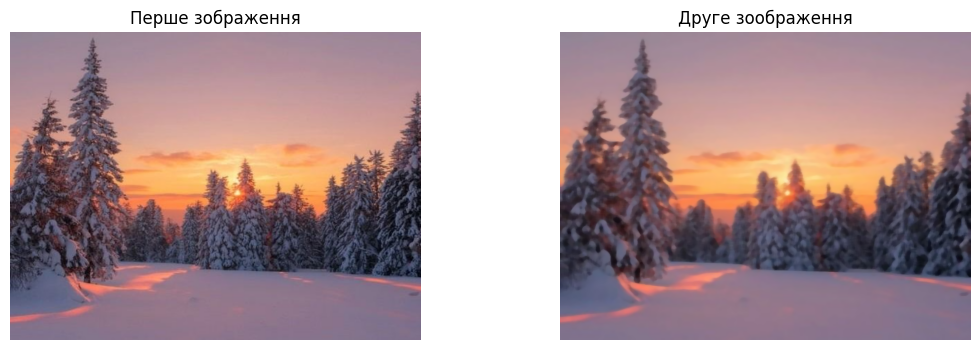

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(img_1)
axes[0].set_title("Перше зображення")
axes[0].axis("off")

axes[1].imshow(result_2)
axes[1].set_title("Друге зоображення")
axes[1].axis("off")

### 5.4 Фільтр ерозії і нарощування 

In [14]:
erosion_dilation = np.array([[0, 0, 1, 0, 0],
                     [0, 1, 1, 1, 0], 
                     [1, 1, 1, 1, 1],
                     [0, 1, 1, 1, 0],
                     [0, 0, 1, 0, 0]])

img_h, img_w, img_c = img_1.shape
filter_h, filter_w = erosion_dilation.shape

pad = filter_h // 2 

padded_img = np.pad(img_1, ((pad, pad), (pad, pad), (0, 0)), mode='reflect')
img_erosion = np.zeros_like(img_1)

for c in range(img_c):  
    for i in range(img_h):
         for j in range(img_w):
             
            region = padded_img[i:i + filter_h, j:j + filter_w, c]  
            img_erosion[i, j, c] = np.min(region[erosion_dilation == 1])
            
img_dilation = np.zeros_like(img_1)

for c in range(img_c):  
    for i in range(img_h):
         for j in range(img_w):
             
            region = padded_img[i:i + filter_h, j:j + filter_w, c]  
            img_dilation[i, j, c] = np.max(region[erosion_dilation == 1])        

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

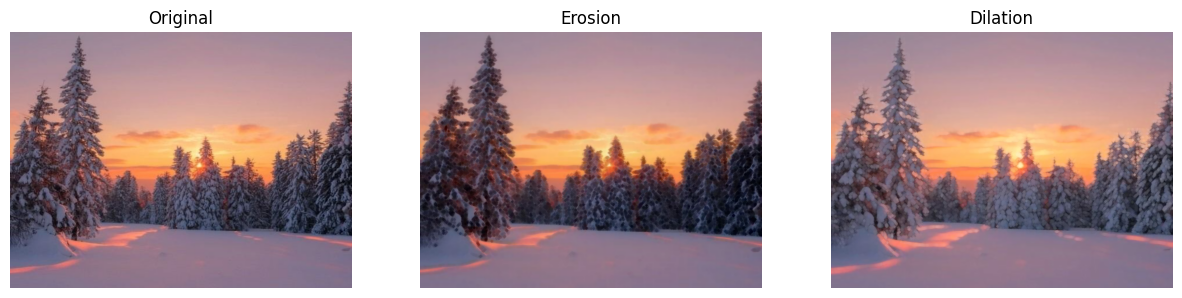

In [15]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].imshow(img_1)
axes[0].set_title("Original")
axes[0].axis("off")

axes[1].imshow(img_erosion)
axes[1].set_title("Erosion")
axes[1].axis("off")

axes[2].imshow(img_dilation)
axes[2].set_title("Dilation")
axes[2].axis("off")

### 5.5 Фільтр Собеля

In [16]:
img_1_gray = cv2.cvtColor(img_1, cv2.COLOR_BGR2GRAY)

y = np.array([[-1, -2, -1], 
              [ 0,  0,  0], 
              [ 1,  2,  1]])

x = np.array([[-1,  0,  1],
              [-2,  0,  2], 
              [-1,  0,  1]])

img_h, img_w = img_1_gray.shape
filter_h, filter_w = y.shape
pad = filter_h // 2 

padded_img = np.pad(img_1_gray, ((pad, pad), (pad, pad)), mode='reflect')

G_y = np.zeros((img_h, img_w), dtype=np.float64) 
G_x = np.zeros((img_h, img_w), dtype=np.float64) 
G = np.zeros((img_h, img_w), dtype=np.float64) 

for i in range(img_h):
    for j in range(img_w):
        
        region = padded_img[i:i + filter_h, j:j + filter_w]  
        
        G_y[i, j] = np.sum(region * y)
        G_x[i, j] = np.sum(region * x)
        G[i, j] = np.sqrt(G_x[i, j]**2 + G_y[i, j]**2)

G = (G / np.max(G) * 255).astype(np.uint8)

(np.float64(-0.5), np.float64(735.5), np.float64(551.5), np.float64(-0.5))

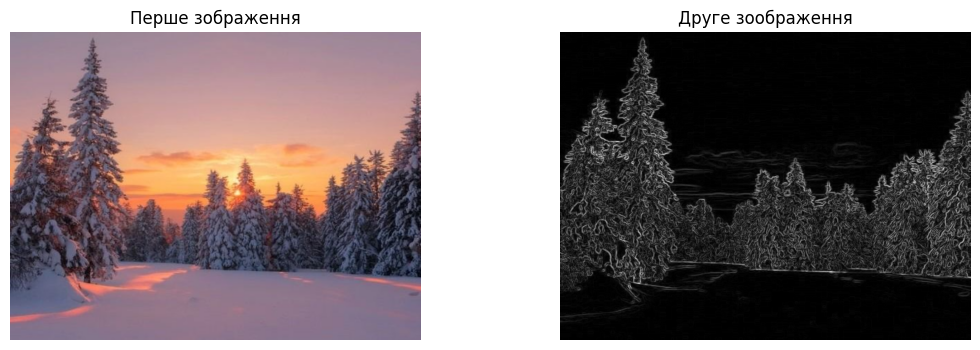

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(13, 4))

axes[0].imshow(img_1)
axes[0].set_title("Перше зображення")
axes[0].axis("off")

axes[1].imshow(G, cmap="gray")
axes[1].set_title("Друге зоображення")
axes[1].axis("off")

### 6.Застосувати медіанний фільтр у часі для відео з рухомими об’єктами.

In [18]:
video = cv2.VideoCapture("videoplayback7.webm")

# while True:
    
#     ret, frame = video.read()
#     cv2.imshow('Video', frame)
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
    
# video.release()
# cv2.destroyAllWindows()

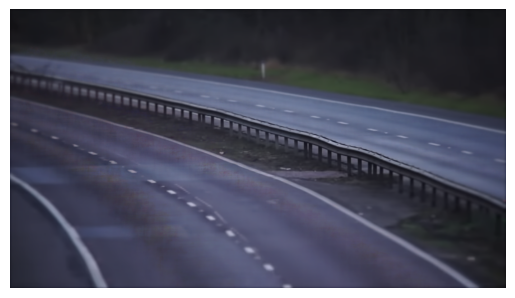

In [19]:
k = 10  
frames = []
number_frames = 0

while True:
    ret, frame = video.read()
    if not ret:
        break
    if number_frames % k == 0:
        frames.append(frame)
    
    number_frames += 1

video.release()

frames = np.array(frames)

median_filter_2 = np.zeros_like(frames[0], dtype=np.uint8) 

num_frames, img_h, img_w, img_c = frames.shape  

for c in range(img_c):  
    for i in range(img_h):  
        for j in range(img_w): 
            pixel_values = [frames[f, i, j, c] for f in range(num_frames)]  
            pixel_values.sort()  
            median_filter_2[i, j, c] = pixel_values[num_frames // 2]  
            

plt.imshow(cv2.cvtColor(median_filter_2, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

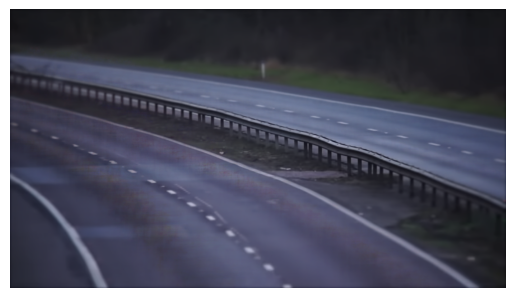

In [20]:
median_filter_1 = np.median(frames, axis=0).astype(np.uint8)

plt.imshow(cv2.cvtColor(median_filter_1, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()